In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
from scipy.stats import norm
import numpy as np


DISTRIBUTION

In [2]:
data = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\jupyter\toy_dataset.csv")
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [3]:
#Mean of age
data['Age'].mean()

np.float64(44.9502)

In [4]:
#median of age
data['Age'].median()

np.float64(45.0)

In [5]:
#mode of age
data['Age'].mode()

0    26
Name: Age, dtype: int64

RANGE

In [6]:
#lowest Age
min= data['Age'].min()
max= data['Age'].max()
range= max-min
range

np.int64(40)

In [7]:
#standard deviation for age
data['Age'].std()

np.float64(11.572485735982024)

In [8]:
#variance of age
data['Age'].var()

np.float64(133.92242610950743)

Normal distribution

Text(0, 0.5, 'Probability')

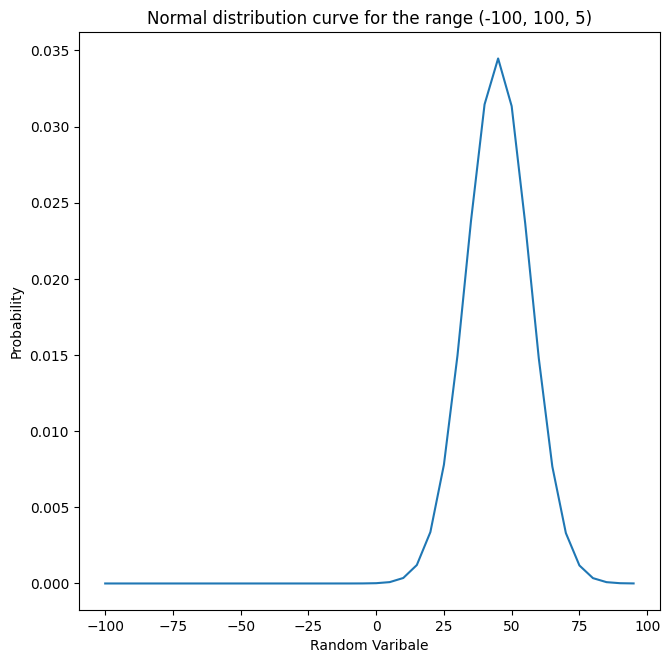

In [9]:
std=11.572
mean= 44.950

x_range = np.arange(-100, 100, 5)
norm_dist_object = stats.norm(mean,std)
norm_dist_object

plt.figure(figsize=(7.5,7.5))
plt.plot(x_range, norm_dist_object.pdf(x_range))
plt.title("Normal distribution curve for the range (-100, 100, 5)")
plt.xlabel("Random Varibale")
plt.ylabel("Probability")

BINOMIAL DISTRIBUTION

In [10]:
from scipy.stats import binom
# nummber of trials
n= 6
#probability of getting heads
p=0.5

prob = binom.cdf(3,n,p)
print(f"the probability is:{prob:.4f}")

the probability is:0.6562


In [11]:
sales= pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\jupyter\retail_sales_dataset.csv")
sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [12]:
sales.shape

(1000, 9)

In [13]:
sales.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [14]:
#finding null values in every column
sales.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [15]:
#number of values for each column
sales.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [16]:
sales["Product Category"].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [17]:
#deleting irrelevant columns
sales.drop(['Customer ID'], axis=1)
sales.head(2)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000


In [18]:
sales['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x189db4edd90>,
 [Text(-1.011200070744165, -0.4329831600963202, 'Clothing'),
  Text(0.9320381485536802, -0.5842130515836053, 'Electronics'),
  Text(0.10084174866809573, 1.0953679481003453, 'Beauty')],
 [Text(-0.5515636749513627, -0.236172632779811, '35.1%'),
  Text(0.5083844446656437, -0.3186616645001483, '34.2%'),
  Text(0.055004590182597665, 0.597473426236552, '30.7%')])

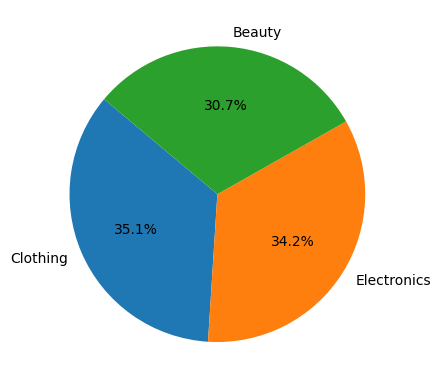

In [19]:
#dispalying products categories sold on pie chart
products=sales["Product Category"].value_counts()
plt.pie(products, labels=products.index,autopct='%1.1f%%', startangle=140)

<Axes: >

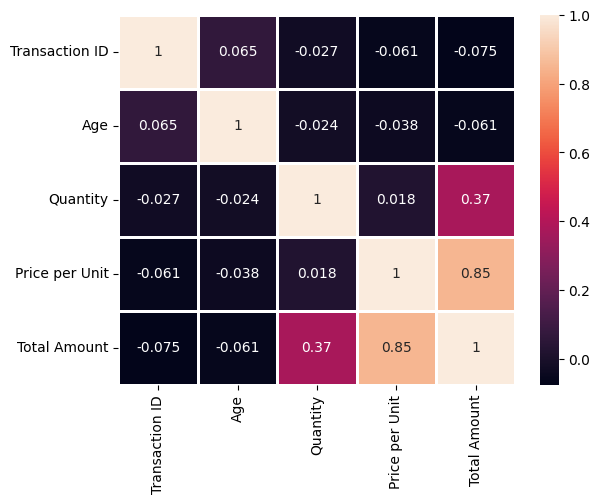

In [20]:
#finding the corelation between these columns 
numerical= sales.select_dtypes(include=['number'])
corr=numerical.corr()
sns.heatmap(corr, linewidth=0.9, annot=True)

In [21]:
sales.head(3)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30


NameError: name 'prod' is not defined

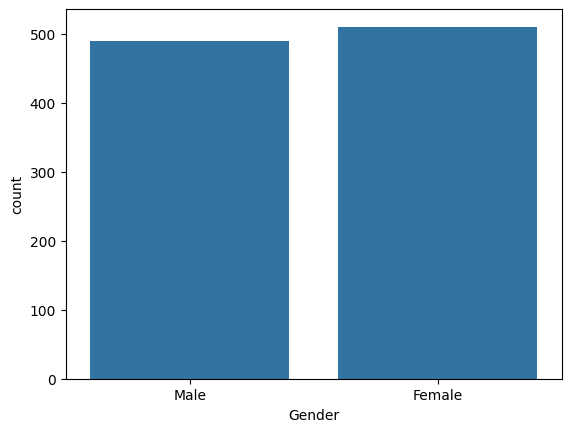

In [22]:
#showing which gender makes the most purchases
cust = sns.countplot(data=sales, x= sales["Gender"])
for count in cust.containers:
    prod.bar_label(count)

In [ ]:
sales[sales["Product Category"] == "Beauty"].Gender.value_counts()
#more females bought beauty products than male


In [ ]:
sales[sales["Product Category"] == "Clothing"].Gender.value_counts()
#more males bought clothing products than female

In [ ]:
sales[sales["Product Category"] == "Electronics"].Gender.value_counts()
#more males bought clothing products than females

In [ ]:
#group bar chart 
products = ['Beauty', 'Clothing', 'Electronics']
male = [318, 177, 172]  
female = [340, 174, 170] 

x = np.arange(len(products))
width = 0.35 
plt.figure(figsize=(10,6))
plt.bar(x-width/2, male, width, label='Male', color='grey')
plt.bar(x+ width/2 , female, width, label='Female', color='purple')

plt.title("No of Customers for each product based on their gender")
plt.xlabel("Products" ,fontsize=14)
plt.ylabel("No of customers", fontsize=14)
plt.xticks(x,products)
plt.legend(title='Gender')

plt.grid(axis='y', linestyle='--')


In [ ]:
sales["Product Category"].value_counts()

In [ ]:
sales.head(3)

In [ ]:
#finding the product that genarates more money from sales
sales.groupby('Product Category')['Total Amount'].sum()

In [ ]:
age_counts=sales[sales['Product Category']== 'Electronics'].Age.value_counts()

In [ ]:
ages = list(age_counts.index)
Customers = list(age_counts.values)

plt.figure(figsize=(10, 6))
plt.scatter(ages, Customers, color='purple', label='Customers')
plt.title('Number of electronics Customers vs. Age', fontsize=16)
plt.xlabel('Age of Customers', fontsize=12)
plt.ylabel('Number of electronics Customers', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

In [ ]:
age_counts=sales[sales['Product Category']== 'Clothing'].Age.value_counts()

In [ ]:
ages = list(age_counts.index)
Customers = list(age_counts.values)

plt.figure(figsize=(10, 6))
plt.scatter(ages, Customers, color='purple', label='Customers')
plt.title('Number of Customers vs. Age who purchases clothing products', fontsize=16)
plt.xlabel('Age of Customers', fontsize=12)
plt.ylabel('Clothing Customers', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

In [ ]:
age_counts=sales[sales['Product Category']== 'Beauty'].Age.value_counts()

In [ ]:
ages = list(age_counts.index)
Customers = list(age_counts.values)

plt.figure(figsize=(10, 6))
plt.scatter(ages, Customers, color='purple', label='Customers')
plt.title('Number of Customers vs. Age who purchases Beauty products', fontsize=16)
plt.xlabel('Age of Customers', fontsize=12)
plt.ylabel('beauty producst Customers', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()